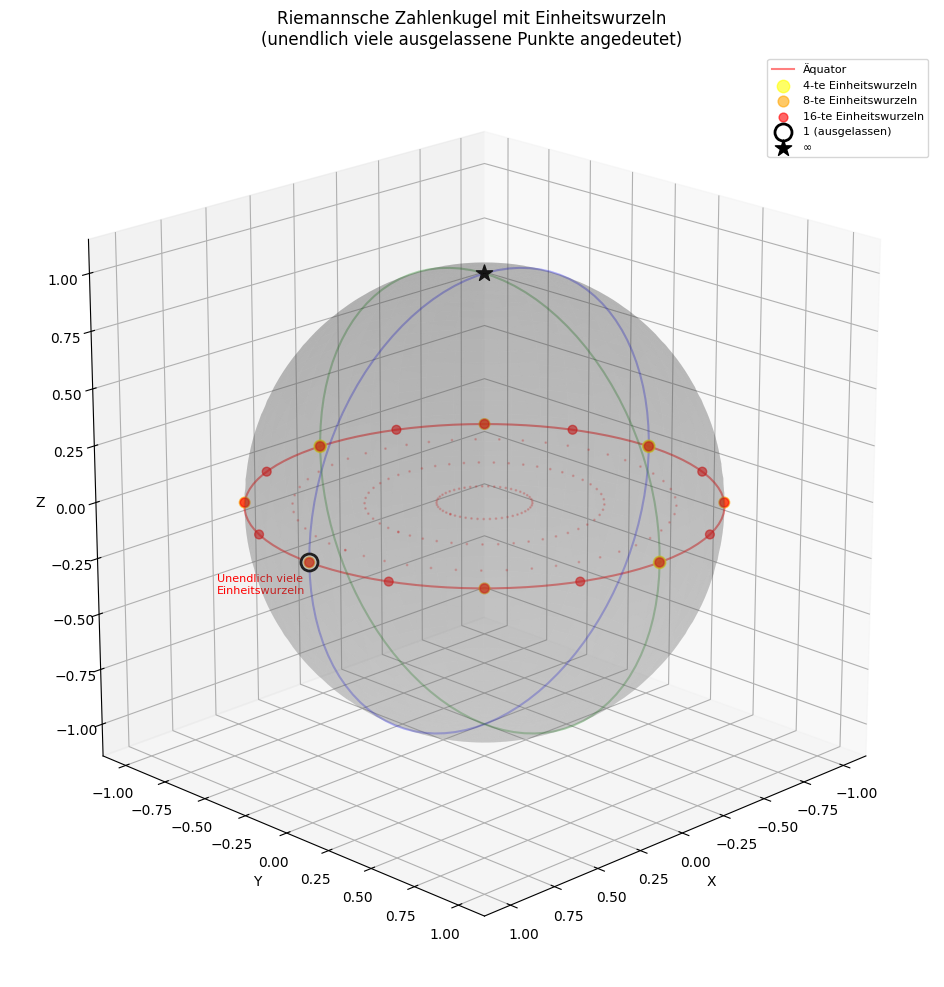

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_sphere_points(n_points=100):
    """Create points for sphere surface"""
    phi = np.linspace(0, 2*np.pi, n_points)
    theta = np.linspace(0, np.pi, n_points)
    phi, theta = np.meshgrid(phi, theta)
    
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z

def create_circle_points(radius=1, n_points=100):
    """Create points for a circle"""
    t = np.linspace(0, 2*np.pi, n_points)
    return radius * np.cos(t), radius * np.sin(t)

def get_nth_roots(n):
    """Calculate n-th roots of unity"""
    t = np.linspace(0, 2*np.pi, n, endpoint=False)
    return np.cos(t), np.sin(t)

def plot_riemann_sphere_with_roots():
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot sphere
    x, y, z = create_sphere_points()
    ax.plot_surface(x, y, z, color='gray', alpha=0.2)
    
    # Plot equator (red circle)
    x_eq, y_eq = create_circle_points()
    z_eq = np.zeros_like(x_eq)
    ax.plot(x_eq, y_eq, z_eq, 'r-', alpha=0.5, label='Äquator')
    
    # Plot meridians
    x_m1, z_m1 = create_circle_points()
    y_m1 = np.zeros_like(x_m1)
    ax.plot(x_m1, y_m1, z_m1, 'b-', alpha=0.3)
    
    y_m2, z_m2 = create_circle_points()
    x_m2 = np.zeros_like(y_m2)
    ax.plot(x_m2, y_m2, z_m2, 'g-', alpha=0.3)
    
    # Plot unity roots for different n
    ns = [4, 8, 16]  # Different orders of unity roots
    colors = ['yellow', 'orange', 'red']
    sizes = [80, 60, 40]
    
    for n, color, size in zip(ns, colors, sizes):
        x_roots, y_roots = get_nth_roots(n)
        ax.scatter(x_roots, y_roots, np.zeros_like(x_roots), 
                  color=color, s=size, alpha=0.6, 
                  label=f'{n}-te Einheitswurzeln')
    
    # Plot points going to infinity to suggest infinite roots
    t = np.linspace(0, 2*np.pi, 50)
    r = np.linspace(0.2, 0.8, 3)
    for ri in r:
        x = ri * np.cos(t)
        y = ri * np.sin(t)
        ax.scatter(x, y, np.zeros_like(x), c='red', s=1, alpha=0.2)
    
    # Highlight point 1 specifically
    ax.scatter([1], [0], [0], color='white', s=150, 
               edgecolor='black', linewidth=2, 
               label='1 (ausgelassen)')
    
    # Infinity point
    ax.scatter([0], [0], [1], color='black', s=150, 
               marker='*', label='∞')
    
    # Formatting
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Riemannsche Zahlenkugel mit Einheitswurzeln\n(unendlich viele ausgelassene Punkte angedeutet)')
    
    # Set equal aspect ratio
    ax.set_box_aspect([1,1,1])
    
    # Add legend with smaller font
    ax.legend(fontsize=8, loc='upper right')
    
    # Add view angle
    ax.view_init(elev=20, azim=45)
    
    # Add text annotation
    ax.text(1.5, 0, 0, "Unendlich viele\nEinheitswurzeln", 
            fontsize=8, color='red')
    
    plt.show()

# Create the visualization
plot_riemann_sphere_with_roots()


